In [2]:
#Importing required packages
import numpy as np
import matplotlib.pyplot as plt
from springrank import SpringRank
import polars as pl
import networkx as nx
from src import rank_swirl

In [ ]:
#read in df
df = pl.read_csv("data/aggXquarter.txt", separator = "\t")

#filter dfs by group + quarter
df_q1_g1 = df.filter(pl.col("study.quarter") == 1).filter(pl.col("group") == "G1")
df_q1_g2 = df.filter(pl.col("study.quarter") == 1).filter(pl.col("group") == "G2")
df_q2_g1 = df.filter(pl.col("study.quarter") == 2).filter(pl.col("group") == "G1")
df_q2_g2 = df.filter(pl.col("study.quarter") == 2).filter(pl.col("group") == "G2")
df_q3_g1 = df.filter(pl.col("study.quarter") == 3).filter(pl.col("group") == "G1")
df_q3_g2 = df.filter(pl.col("study.quarter") == 3).filter(pl.col("group") == "G2")
df_q4_g1 = df.filter(pl.col("study.quarter") == 4).filter(pl.col("group") == "G1")
df_q4_g2 = df.filter(pl.col("study.quarter") == 4).filter(pl.col("group") == "G2")

#create list / dictionary to filter by group + quarter (tuple) (this doesn't work yet)
df_dict = {df_q1_g1, df_q1_g2, df_q2_g1, df_q2_g2, df_q3_g1, df_q3_g2, df_q4_g1, df_q4_g2}


TypeError: unhashable type: 'DataFrame'

In [ ]:
G_dict = {}
A_dict = {}
S_dict = {}
for df in df_dict: 
    G = nx.DiGraph()
    G.add_weighted_edges_from(df[["actor", "target","number.wins"]].rows())
    A = nx.to_numpy_array(G)
    #save these somehow
    A_dict[df] = A
    G_dict[df] = G
    model = SpringRank(alpha = 0.1)
    model.fit(A)
    S = model.ranks
    S
    np.argsort(S)[::-1], S #create ordinal ranking
    #methods will have some figures

SyntaxError: invalid syntax (2984560032.py, line 2)

In [ ]:
#set up a figure we can put each quarter's network on to compare
fig, ax = plt.subplots(4,4, figsize = (12,12))
#draw first quarter graph
for G in G_dict: 
    nx.draw(G, with_labels=True, node_size=50, node_color='skyblue', font_size=10, edge_color='gray', alpha=0.6)
    plt.title("First Quarter") #figure out how to label 
    plt.subplot(2,2,1) #these numbers probably aren't right - figure out how to change
    plt.show()

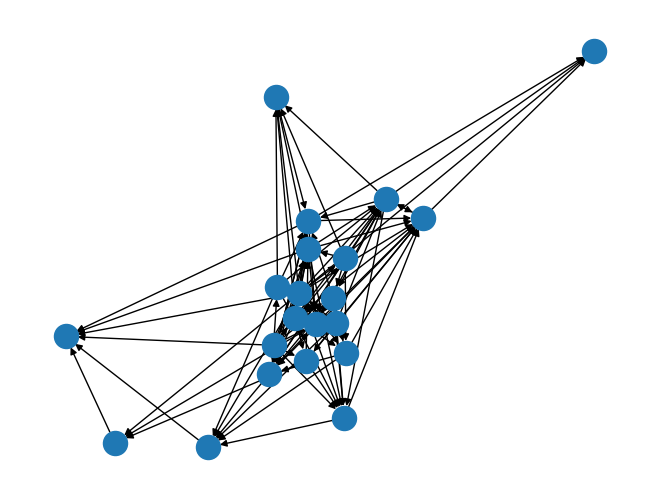

In [ ]:
nx.draw(G)
plt.imshow(A)

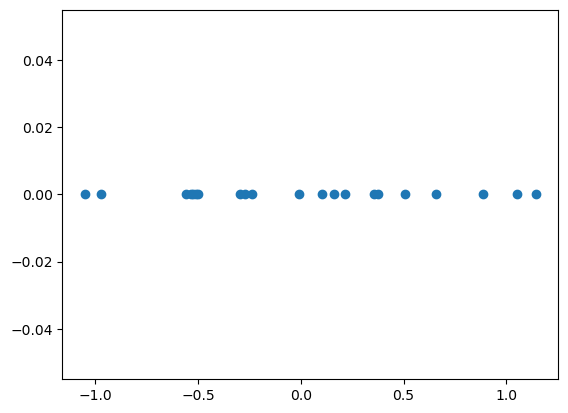

In [19]:
plt.plot(S, np.zeros(len(S)), "o")

In [20]:
rank_swirl.nx2rankfigure(S,G)